# digits 데이터셋

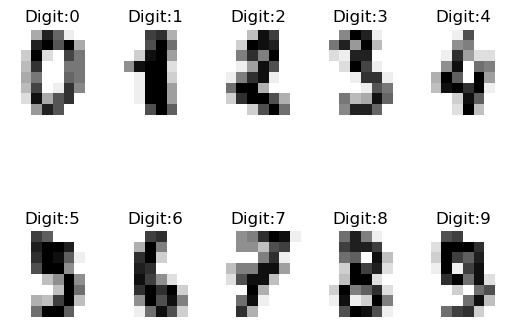

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets

# digits 데이터 로드
digits = datasets.load_digits()

# 이미지를 2행 5열로 표시
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2 ,5 ,label+1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit:{0}'.format(label))
    
plt.show()

# 분류기를 만들어 평가

In [7]:
import numpy as np
from sklearn import datasets

#손으로 쓴 숫자 데이터 읽기
digits = datasets.load_digits()

# 3과 8 데이터 위치 구하기
flag_3_8 = (digits.target == 3) + (digits.target == 8)

# 3과 8 데이터 구하기
images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

# 3과 8 이미지 데이터를 1차원화
images = images.reshape(images.shape[0],-1)

In [9]:
from sklearn import tree

# 3과 8 이미지 데이터를 1차원화
images = images.reshape(images.shape[0], -1)

# 분류기 생성
n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5)
classifier = tree.DecisionTreeClassifier()
classifier.fit(images[:train_size], labels[:train_size])

DecisionTreeClassifier()

In [11]:
from sklearn import metrics

expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:\n',
     metrics.accuracy_score(expected,predicted))

Accuracy:
 0.8811188811188811


# 분류기 성능 평가

<svg viewBox="0 0 500 400" xmlns="http://www.w3.org/2000/svg">
  <!-- 혼동행렬 -->
  <rect x="50" y="50" width="200" height="200" fill="#f0f0f0" stroke="black"/>
  <line x1="50" y1="150" x2="250" y2="150" stroke="black"/>
  <line x1="150" y1="50" x2="150" y2="250" stroke="black"/>
  
  <!-- 레이블 -->
  <text x="70" y="120" font-size="14">True Positive</text>
  <text x="180" y="120" font-size="14">False Negative</text>
  <text x="70" y="200" font-size="14">False Positive</text>
  <text x="180" y="200" font-size="14">True Negative</text>
  
  <!-- 수식 -->
  <text x="300" y="80" font-size="14">정확도 = (TP + TN) / 전체</text>
  <text x="300" y="120" font-size="14">정밀도 = TP / (TP + FP)</text>
  <text x="300" y="160" font-size="14">재현율 = TP / (TP + FN)</text>
  <text x="300" y="200" font-size="14">F1 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)</text>
</svg>

<svg viewBox="0 0 500 300" xmlns="http://www.w3.org/2000/svg">
  <!-- 5-fold CV 시각화 -->
  <rect x="50" y="50" width="400" height="40" fill="#e6e6e6" stroke="black"/>
  <rect x="50" y="100" width="400" height="40" fill="#e6e6e6" stroke="black"/>
  <rect x="50" y="150" width="400" height="40" fill="#e6e6e6" stroke="black"/>
  <rect x="50" y="200" width="400" height="40" fill="#e6e6e6" stroke="black"/>
  
  <!-- 폴드 구분선 -->
  <line x1="130" y1="50" x2="130" y2="240" stroke="black"/>
  <line x1="210" y1="50" x2="210" y2="240" stroke="black"/>
  <line x1="290" y1="50" x2="290" y2="240" stroke="black"/>
  <line x1="370" y1="50" x2="370" y2="240" stroke="black"/>
  
  <!-- 검증 폴드 표시 -->
  <rect x="50" y="50" width="80" height="40" fill="#ff9999"/>
  <rect x="130" y="100" width="80" height="40" fill="#ff9999"/>
  <rect x="210" y="150" width="80" height="40" fill="#ff9999"/>
  <rect x="290" y="200" width="80" height="40" fill="#ff9999"/>
</svg>

<svg viewBox="0 0 500 300" xmlns="http://www.w3.org/2000/svg">
  <!-- 5-fold CV 시각화 -->
  <rect x="50" y="50" width="400" height="40" fill="#e6e6e6" stroke="black"/>
  <rect x="50" y="100" width="400" height="40" fill="#e6e6e6" stroke="black"/>
  <rect x="50" y="150" width="400" height="40" fill="#e6e6e6" stroke="black"/>
  <rect x="50" y="200" width="400" height="40" fill="#e6e6e6" stroke="black"/>
  
  <!-- 폴드 구분선 -->
  <line x1="130" y1="50" x2="130" y2="240" stroke="black"/>
  <line x1="210" y1="50" x2="210" y2="240" stroke="black"/>
  <line x1="290" y1="50" x2="290" y2="240" stroke="black"/>
  <line x1="370" y1="50" x2="370" y2="240" stroke="black"/>
  
  <!-- 검증 폴드 표시 -->
  <rect x="50" y="50" width="80" height="40" fill="#ff9999"/>
  <rect x="130" y="100" width="80" height="40" fill="#ff9999"/>
  <rect x="210" y="150" width="80" height="40" fill="#ff9999"/>
  <rect x="290" y="200" width="80" height="40" fill="#ff9999"/>
</svg>

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import numpy as np

# 기존 결정트리 성능 평가
def evaluate_classifier(y_true, y_pred, model_name="Model"):
    print(f"\n{model_name} Performance Evaluation:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nDetailed Performance Metrics:")
    print(classification_report(y_true, y_pred))

# 결정트리 평가
evaluate_classifier(expected, predicted, "Decision Tree")

# 다양한 분류기 학습 및 평가
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

# 각 분류기 학습 및 평가
for name, clf in classifiers.items():
    # 학습
    clf.fit(images[:train_size], labels[:train_size])
    
    # 예측
    predictions = clf.predict(images[train_size:])
    
    # 성능 평가
    evaluate_classifier(expected, predictions, name)
    
    print('*'*50)


Decision Tree Performance Evaluation:
Confusion Matrix:
[[60 15]
 [ 2 66]]

Detailed Performance Metrics:
              precision    recall  f1-score   support

           3       0.97      0.80      0.88        75
           8       0.81      0.97      0.89        68

    accuracy                           0.88       143
   macro avg       0.89      0.89      0.88       143
weighted avg       0.90      0.88      0.88       143


Random Forest Performance Evaluation:
Confusion Matrix:
[[65 10]
 [ 1 67]]

Detailed Performance Metrics:
              precision    recall  f1-score   support

           3       0.98      0.87      0.92        75
           8       0.87      0.99      0.92        68

    accuracy                           0.92       143
   macro avg       0.93      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143

**************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Performance Evaluation:
Confusion Matrix:
[[61 14]
 [ 0 68]]

Detailed Performance Metrics:
              precision    recall  f1-score   support

           3       1.00      0.81      0.90        75
           8       0.83      1.00      0.91        68

    accuracy                           0.90       143
   macro avg       0.91      0.91      0.90       143
weighted avg       0.92      0.90      0.90       143

**************************************************

SVM Performance Evaluation:
Confusion Matrix:
[[65 10]
 [ 0 68]]

Detailed Performance Metrics:
              precision    recall  f1-score   support

           3       1.00      0.87      0.93        75
           8       0.87      1.00      0.93        68

    accuracy                           0.93       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.93      0.93       143

**************************************************
